In [1]:
#importing ncessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,f_classif
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#loading testing data
testdf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [4]:
#checking metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
#Checking null values
df.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
cat_feature=['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
for i in cat_feature:
  print(df[i].value_counts())
  print('-'*50)

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
--------------------------------------------------
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
--------------------------------------------------
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
--------------------------------------------------
no     31062
yes      585
Name: default, dtype: int64
--------------------------------------------------
yes    17584
no     14063
Name: housing, dtype: int64
--------------------------------------------------
no     26516
yes     5131
Name: loan, dtype: int64
--------------------------------------------------
cellular     20423
unknown       9177
telephone     2047
Na

<Axes: xlabel='age', ylabel='Count'>

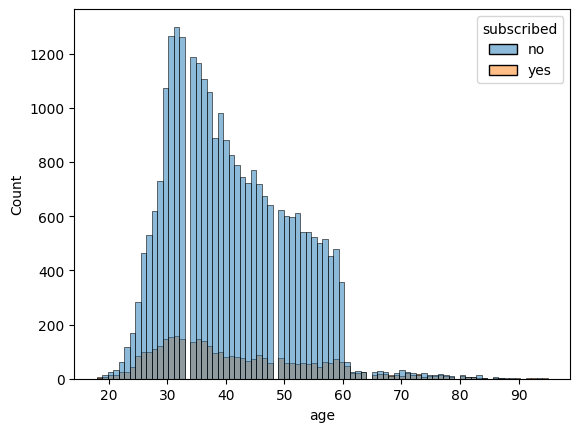

In [7]:
#age distribution
sns.histplot(df,x='age',hue='subscribed')

Most cleints are under age of 25-60  
subscribers are not in specific age group

In [8]:
#statistical information about age
df['age'].describe()

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

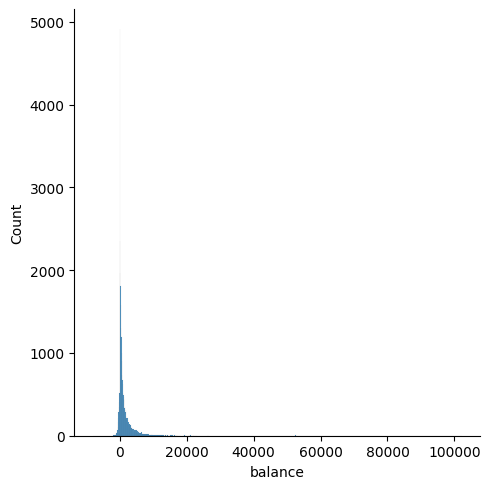

In [9]:
#balance distribution
sns.displot(df,x='balance')

Balance is right skewed

In [10]:
#statistical information about balance
df['balance'].describe()

count     31647.000000
mean       1363.890258
std        3028.304293
min       -8019.000000
25%          73.000000
50%         450.000000
75%        1431.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

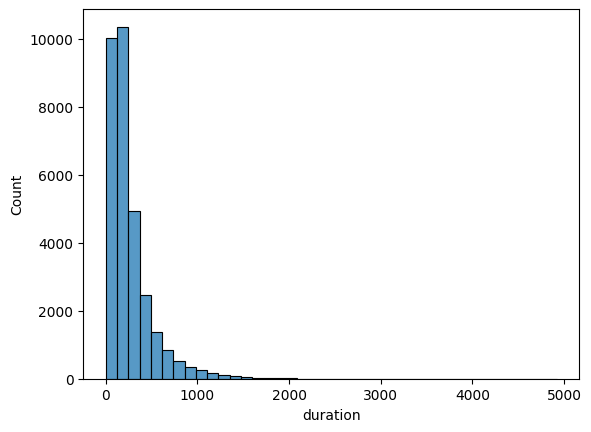

In [11]:
#duration distribution
sns.histplot(df,x='duration',bins=40)

Duration is right skewed

In [12]:
#statistical information about duration
df['duration'].describe()

count    31647.000000
mean       258.113534
std        257.118973
min          0.000000
25%        104.000000
50%        180.000000
75%        318.500000
max       4918.000000
Name: duration, dtype: float64

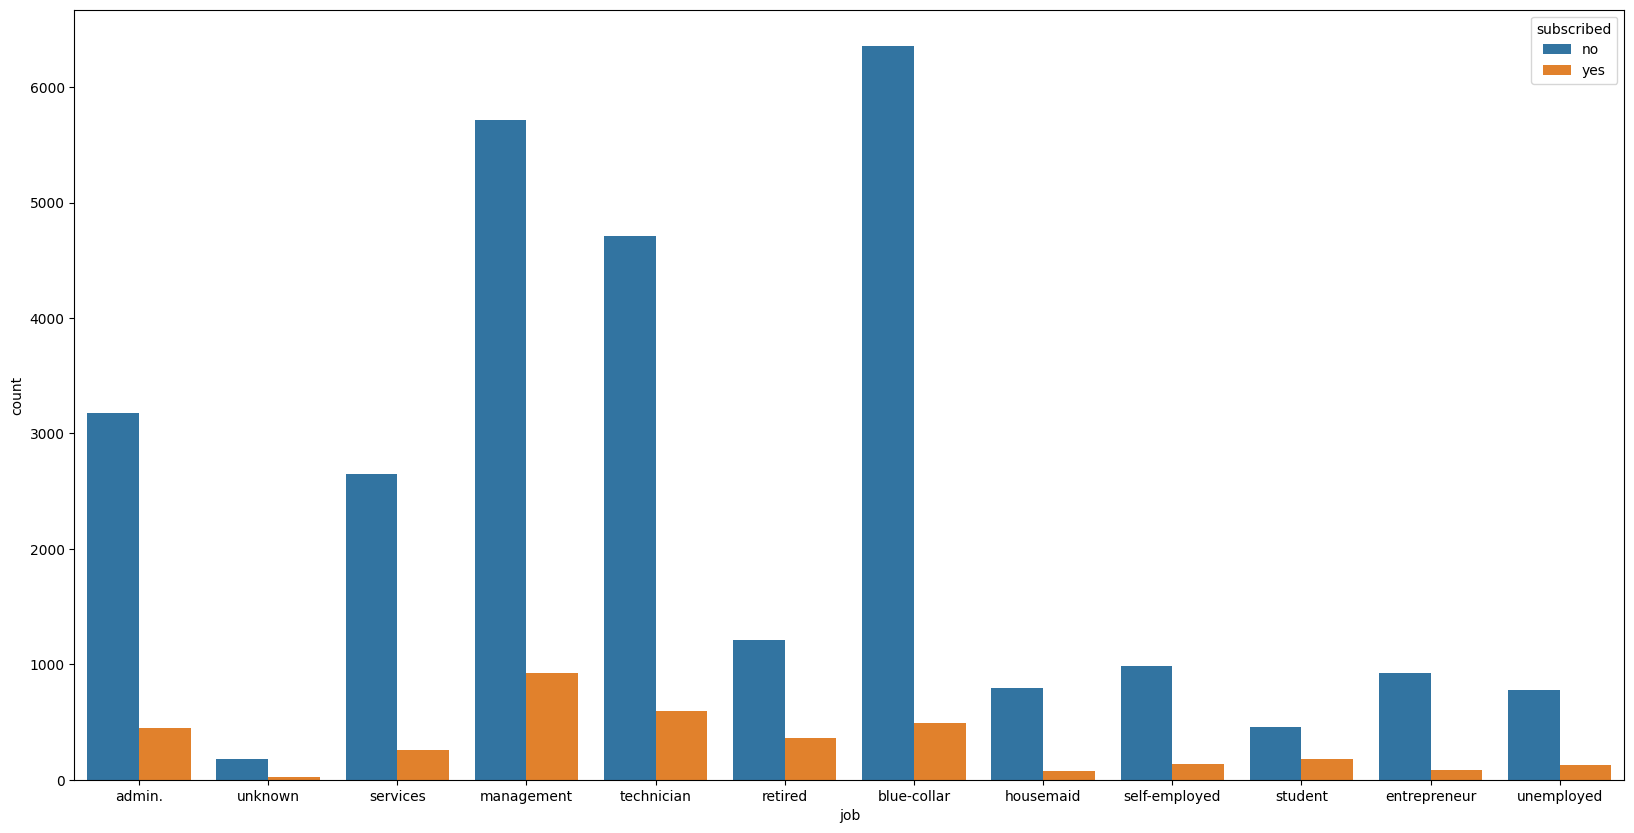

In [13]:
#type of job and there subscribing ratio
plt.figure(figsize=(20,10))
sns.countplot(df,x='job',hue='subscribed')
plt.show()

The customer's with job role admin, management, technician, blue-collar and retired are subscribing more

<Axes: xlabel='pdays', ylabel='Count'>

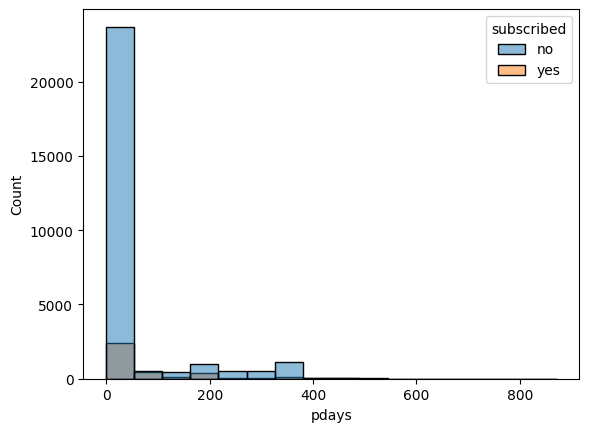

In [14]:
#pdays and there subscribing ratio
sns.histplot(df,x='pdays',hue='subscribed')

Less gap between last contact with customer is more in fever that customer will subscribe  

<Axes: xlabel='housing', ylabel='count'>

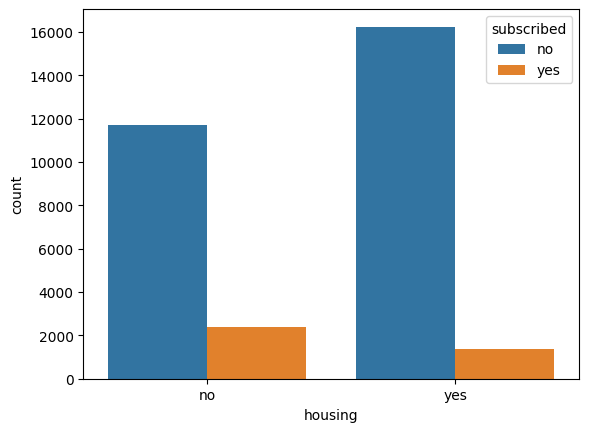

In [15]:

#housing and there subscribing ratio
sns.countplot(df,x='housing',hue='subscribed')

The customer's which are not having housing loan are subscribing more as compare to customer's with loan, but there is a significant amount of customers with loan are also subscribing term deposite

<Axes: xlabel='loan', ylabel='count'>

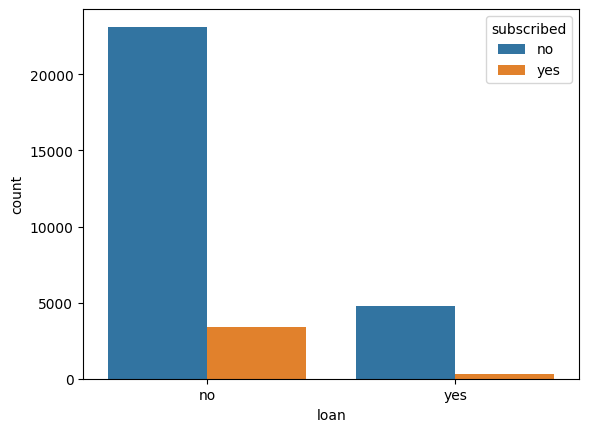

In [16]:

#loan and there subscribing ratio
sns.countplot(df,x='loan',hue='subscribed')

The customeer's which are not having personal loan are more likely to subscribe term deposite

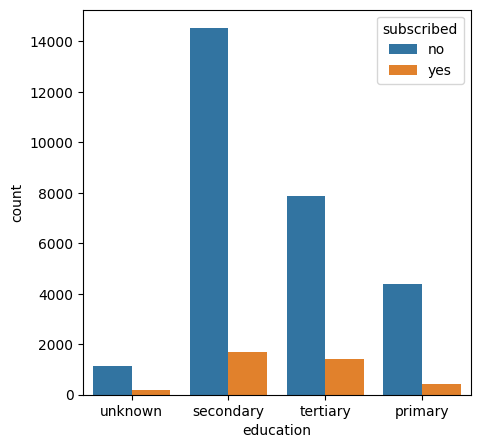

In [17]:
#education and there subscribing ratio
plt.figure(figsize=(5,5))
sns.countplot(df,x='education',hue='subscribed')
plt.show()

Well educated customer's are subscribing more

<Axes: xlabel='subscribed', ylabel='count'>

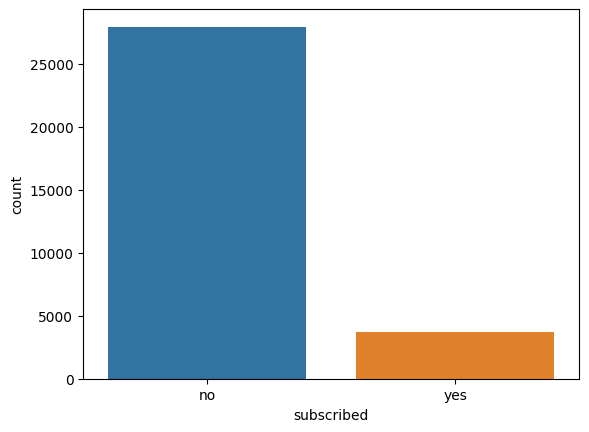

In [18]:
#count of subscriber and non-suscribeer
sns.countplot(df,x='subscribed')

In [19]:
#Feature Encoding
encode=LabelEncoder()
for col in cat_feature:
  df[col]=encode.fit_transform(df[col])

In [20]:
#Feature Encoding for testdf
encode=LabelEncoder()
for col in cat_feature[0:-1]:
  testdf[col]=encode.fit_transform(testdf[col])

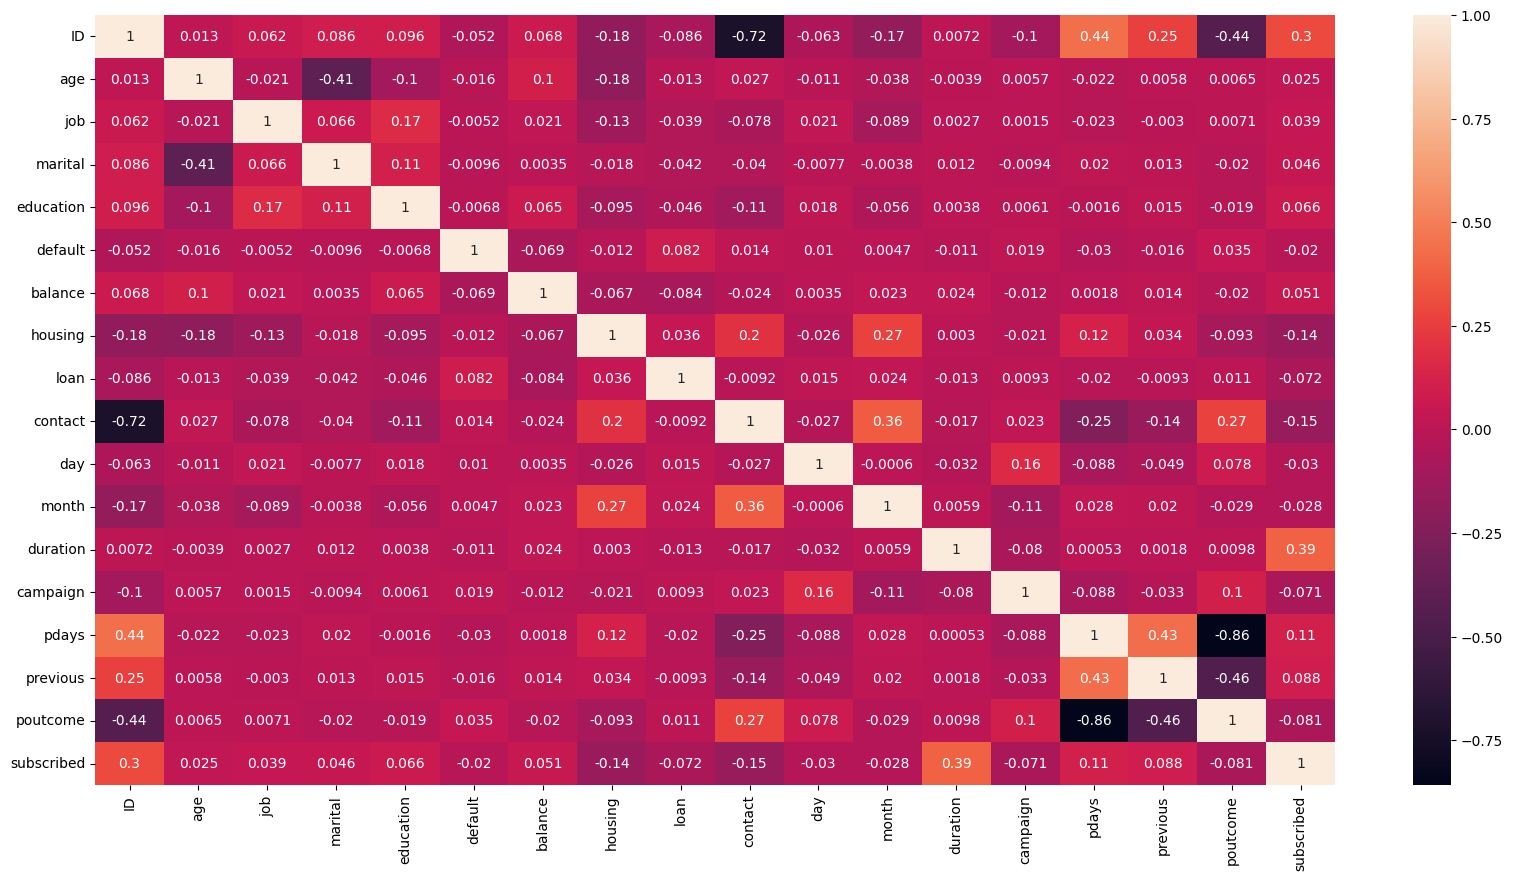

In [21]:
#Checking Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

poutcome and pdays having strong negative correlation

In [22]:
#Deleting unwanted column
df.drop(columns=['ID'],axis=1,inplace=True)

In [23]:
#Deleting unwanted column from testdf
testdf.drop(columns=['ID'],axis=1,inplace=True)

In [24]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [25]:
import numpy as np
for i in df.columns[0:-1]:
  df[i]=np.cbrt(df[i])

In [26]:
#spliting feature and label
X=df.drop('subscribed',axis=1)
y=df['subscribed']

In [27]:
#feature scaling
scal=StandardScaler()
X_scal=scal.fit_transform(X)

**Model Building**

In our csae there is no actula label data in testing file, So we were going to train and test our model using training file only. Then we will select best model and finally we will retrain this model on whole training data.

In [28]:
#finding best random state
maxscr=0
ind=0
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(X_scal,y,test_size=0.20,random_state=i)
  lc=LogisticRegression()
  lc.fit(x_train,y_train)
  scr=accuracy_score(y_test,lc.predict(x_test))
  if scr > maxscr:
    maxscr=scr
    ind=i
print('maxscore {} at {} random state'.format(maxscr,ind))

maxscore 0.9039494470774092 at 61 random state


In [29]:
#spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(X_scal,y,test_size=0.20,random_state=ind)

In [53]:
def train_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*50)
  print('Training Score')
  tr_y_pred=alg.predict(x_train)
  print('{:.2f}'.format(accuracy_score(y_train,tr_y_pred)))
  print('-'*50)
  print('Testing Score')
  test_y_pred=alg.predict(x_test)
  print('{:.4f}'.format(accuracy_score(y_test,test_y_pred)))
  return alg

In [35]:
#building logisticrgresser
lr=train_model(LogisticRegression(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
0.89
--------------------------------------------------
Testing Score
0.90


In [37]:
#building kneighborsclassifier
knn=train_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
0.91
--------------------------------------------------
Testing Score
0.90


In [38]:
#building svc
svc=train_model(SVC(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
0.90
--------------------------------------------------
Testing Score
0.91


In [39]:
#building randomforestclassifier
rf=train_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
1.00
--------------------------------------------------
Testing Score
0.91


In [40]:
#building adbostclassifier
abc=train_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
0.90
--------------------------------------------------
Testing Score
0.90


In [41]:
#building gradientboostingclassifier
gbc=train_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
0.91
--------------------------------------------------
Testing Score
0.91


In [42]:
#building decisiontreeclassifier
dt=train_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

--------------------------------------------------
Training Score
1.00
--------------------------------------------------
Testing Score
0.88


**Cross Validation**

In [43]:
def cross_val(model, tr_model, x_scal, y, x_test, y_test, n):
  cv=cross_val_score(model,x_scal,y,cv=n)
  print('-'*50)
  print(cv)
  print('\nCross Validation Score Mean: ',cv.mean()*100)
  print('-'*50)
  print('Testing Score of Trained Model')
  print((accuracy_score(y_test,tr_model.predict(x_test)))*100)
  print('\nDifference between cv mean and testing score of trained model')
  print((cv.mean()*100)-((accuracy_score(y_test,tr_model.predict(x_test)))*100))


In [44]:
#cross validation of logisticregression
cross_val(LogisticRegression(), lr, X_scal, y, x_test, y_test, 10)

--------------------------------------------------
[0.89225908 0.89668246 0.9014218  0.89794629 0.89036335 0.89447077
 0.8906793  0.89728192 0.89412137 0.89696587]

Cross Validation Score Mean:  89.52192217741856
--------------------------------------------------
Testing Score of Trained Model
90.39494470774092

Difference between cv mean and testing score of trained model
-0.8730225303223591


In [45]:
#cross validation of kneighborsclassifier
cross_val(KNeighborsClassifier(), knn, X_scal, y, x_test, y_test, 10)

--------------------------------------------------
[0.89099526 0.89478673 0.89826224 0.88372828 0.89131122 0.8906793
 0.88846761 0.88938053 0.8874842  0.88969659]

Cross Validation Score Mean:  89.04791962500724
--------------------------------------------------
Testing Score of Trained Model
90.0

Difference between cv mean and testing score of trained model
-0.9520803749927609


In [46]:
#cross validation of svc
cross_val(SVC(), svc, X_scal, y, x_test, y_test, 10)

--------------------------------------------------
[0.8957346  0.90078989 0.89952607 0.89921011 0.8906793  0.90236967
 0.89510269 0.90297092 0.89696587 0.89917826]

Cross Validation Score Mean:  89.82527366522669
--------------------------------------------------
Testing Score of Trained Model
90.8214849921011

Difference between cv mean and testing score of trained model
-0.9962113268744162


In [47]:
#cross validation of randomforestclassifier
cross_val(RandomForestClassifier(), rf, X_scal, y, x_test, y_test, 10)

--------------------------------------------------
[0.90394945 0.90805687 0.90995261 0.90647709 0.9042654  0.90552923
 0.90015798 0.90771176 0.90139064 0.90802781]

Cross Validation Score Mean:  90.55518840510241
--------------------------------------------------
Testing Score of Trained Model
91.26382306477093

Difference between cv mean and testing score of trained model
-0.7086346596685189


In [48]:
#cross validation of adaboostclassifier
cross_val(AdaBoostClassifier(), abc, X_scal, y, x_test, y_test, 10)

--------------------------------------------------
[0.89320695 0.89383886 0.90236967 0.89889415 0.88372828 0.89605055
 0.89478673 0.89981037 0.89570164 0.89949431]

Cross Validation Score Mean:  89.5788151858487
--------------------------------------------------
Testing Score of Trained Model
90.39494470774092

Difference between cv mean and testing score of trained model
-0.816129521892222


In [49]:
#cross validation of gradientboostingClassifier
cross_val(GradientBoostingClassifier(), gbc, X_scal, y, x_test, y_test, 10)

--------------------------------------------------
[0.8985782  0.91058452 0.90805687 0.907109   0.89605055 0.90616114
 0.89699842 0.90834387 0.89981037 0.90297092]

Cross Validation Score Mean:  90.34663862609173
--------------------------------------------------
Testing Score of Trained Model
91.45339652448658

Difference between cv mean and testing score of trained model
-1.1067578983948465


**Tuning**

In [50]:
#Model Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False] }
tune=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=10,scoring='accuracy',cv=5,random_state=55)
tune.fit(x_train,y_train)
tune.best_params_


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [57]:
#building randomforestclassifier(final)
retrained_rf=RandomForestClassifier(n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',max_depth=None,bootstrap=True)
retrained_rf.fit(X_scal,y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300)

In [58]:
#Saving Model
import pickle as pkl
pkl.dump(retrained_rf,open('Random_FC_Bank_marketing.sav','wb'))

In [59]:
#importing model
model=pkl.load(open('Random_FC_Bank_marketing.sav','rb'))

In [60]:
cmp_df=pd.DataFrame()
cmp_df['Prediction']=model.predict(testdf)
cmp_df

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,1
13561,0
13562,1
